In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Cause plots to be displayed in the notebook:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Override default figure sizing:
pylab.rcParams['figure.figsize'] = (10, 6)
sns.set(color_codes = True)

In [3]:
#recognize special characters(missing values) as NAN
missing_values = ["n/a", "na", "--"]
titanic=pd.read_csv('C://Users/monic/Desktop/data science -insitute of dat/DATA/titanic.csv',na_values=missing_values)

In [4]:
titanic.head(300)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,0,1,"Lewy, Mr. Ervin G",male,NaN,0,0,PC 17612,27.7208,NaN,C
296,297,0,3,"Hanna, Mr. Mansour",male,23.5,0,0,2693,7.2292,NaN,C
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S
298,299,1,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.5000,C106,S


In [5]:
print(titanic.shape)

(891, 12)


## Data Profiling

In [6]:
#check for Nulls
pd.isnull(titanic).sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#check if there are children in the null values for age by querying the  word master in the name.
Child_nullAge=titanic[(titanic.Name.str.contains('Master'))&(titanic.Age.isnull())]
#Get the index
Child_nullAge.index

Int64Index([65, 159, 176, 709], dtype='int64')

In [90]:
#review the mean age for the group under 18 to assign it to the group of children with Null value for age
under18_group=pd.cut(titanic['Age'], bins=[0,18,np.inf])
groupby_under18_groups= titanic.groupby(under18_group).mean()
groupby_under18_groups

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,,
"(0.0, 18.0]",440.818182,0.503497,2.573427,10.696993,1.314685,0.944056,32.46929
"(18.0, inf]",449.328696,0.382609,2.158261,34.287826,0.332174,0.309565,35.22484


In [92]:
#Replace the null values of the children by the age.mean for this category =10.5
titanic.iloc[[65,159, 176, 709],5:6]=10.5

In [93]:
#check that the values have been replaced
pd.isnull(titanic).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            173
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# replace the remaining nan values in age column by median of age
median = titanic['Age'].median()
titanic['Age'].fillna(median, inplace=True)

In [9]:
pd.isnull(titanic).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
titanic.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [98]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


## Comparison Pclass and Survival

In [12]:
titanic.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [71]:
#check survival numbers according to pclass
t_survival_class= titanic.groupby(['Sex','Pclass']).agg({'Survived':'sum'})
print(t_survival_class)

               Survived
Sex    Pclass          
female 1             91
       2             70
       3             72
male   1             45
       2             17
       3             47


total people survived: Survived    342
dtype: int64


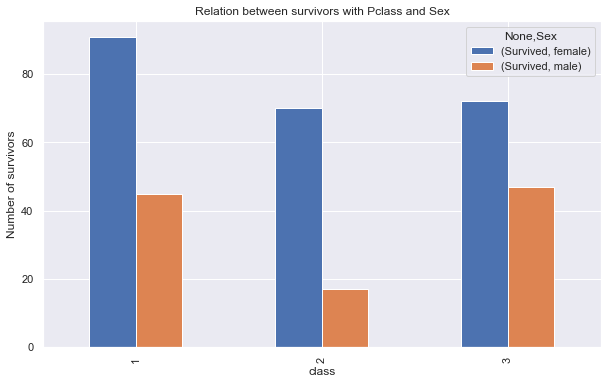

In [77]:
Graph = t_survival_class.unstack(level=-0)

Graph.plot.bar()
plt.xlabel('class')
plt.ylabel('Number of survivors')
plt.title('Relation between survivors with Pclass and Sex')
print('total people survived:',t_survival_class.sum())

the proportion of survival for female was higher in first class

## Fare according to Sex

In [26]:
#fare prices and number of pasanger per fare
titanic['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [27]:
agg={
    'Fare': 'mean'
    ,'Age': 'mean'
    
}
T_groupbysex = titanic.groupby('Sex').agg(agg)
#from the mean we can see that the average ticket for womenw is higher than for men
print(T_groupbysex)

             Fare        Age
Sex                         
female  44.479818  27.929936
male    25.523893  30.140676


In [28]:
titanic.groupby('Sex')['Fare'].min()

Sex
female    6.75
male      0.00
Name: Fare, dtype: float64

Text(0.5, 1.0, 'Mean of Fare and Age by Sex')

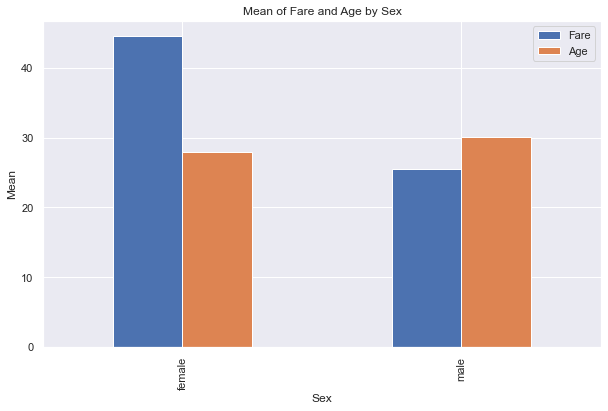

In [61]:
T_groupbysex.plot.bar()
plt.xlabel('Sex')
plt.ylabel('Mean')
plt.title('Mean of Fare and Age by Sex')

the average fare ticket for female ($44.4) was higher than the average price for male (25.52), also the average Famale age (27.9years) was lower than Manle (30.1years)

## Comparison of Age, Sex with Survival

In [46]:
#compare amount of people that survived by sex

agg2={'Survived': 'sum'}
titanic.groupby('Sex').agg(agg2)

,Survived
Sex,
female,233
male,109


In [31]:
##to compare how age affected their chances of survival
#forst group Survived age by categories
age_groups=pd.cut(titanic['Age'], bins=[0,10,20,30,40,50,60,np.inf])
groupby_age_groups= titanic.groupby(age_groups)['Survived'].sum()
print(groupby_age_groups)

Age
(0.0, 10.0]      38
(10.0, 20.0]     44
(20.0, 30.0]    136
(30.0, 40.0]     69
(40.0, 50.0]     33
(50.0, 60.0]     17
(60.0, inf]       5
Name: Survived, dtype: int64


In [32]:
groupb_age_sex=titanic.groupby(['Sex',age_groups])['Survived'].sum()

visual = groupb_age_sex.unstack(level=-1)


Text(0.5, 1.0, 'Number of Survivors according to Sex and Age')

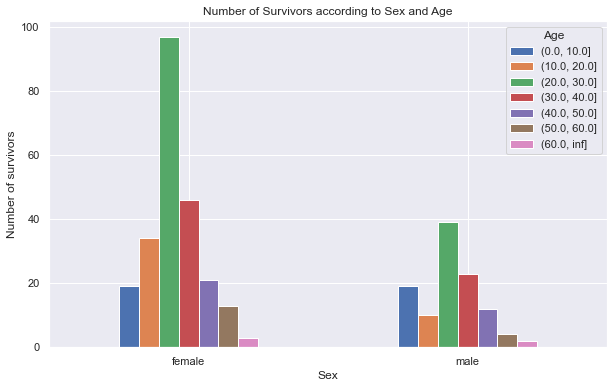

In [63]:
visual.plot.bar(rot=0)
plt.xlabel('Sex')
plt.ylabel('Number of survivors')
plt.title('Number of Survivors according to Sex and Age')


the highest proportion of females and males that survived are in the age range between 20 to 30 years old.

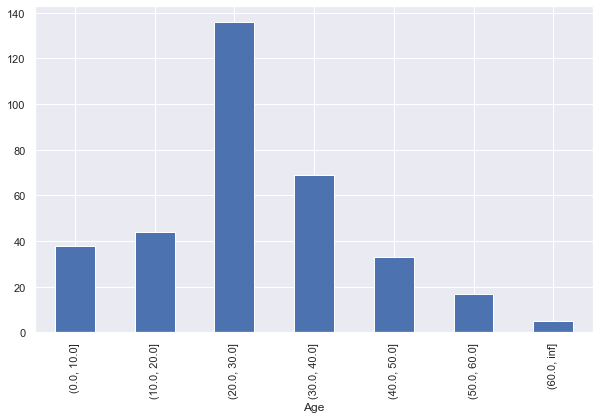

In [65]:
groupby_age_groups.plot.bar()

## Correlations

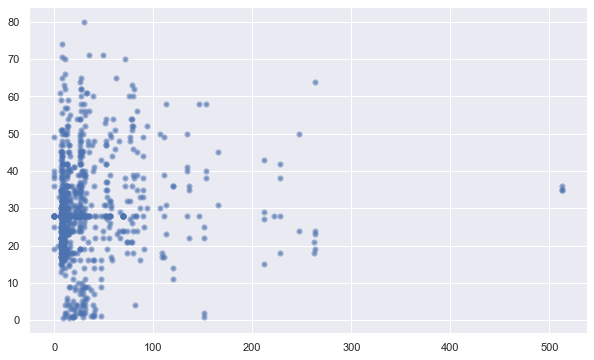

In [56]:
plt.scatter(titanic['Fare'],titanic['Age'],s=10,linewidths = 3, alpha = 0.5)

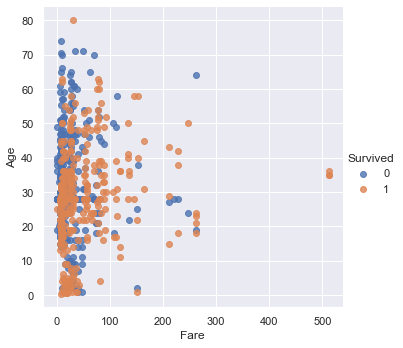

In [30]:
# To check correlation between Fare and Age of people that survived
sns.lmplot(x ='Fare', y ='Age',hue='Survived', data=titanic, fit_reg = False)

## Analysis of SibSp

In [106]:
fam_size=['single','one','many']
size = []
tsibsp=titanic.SibSp##list(map(int,titanic.SibSp.values))
for i in range(len(tsibsp)):
    if tsibsp[i]==0:
        fsize=fam_size[0]
    elif tsibsp[i]==1:
        fsize=fam_size[1]
    elif tsibsp[i]>2:
        fsize=fam_size[2]
    size.append(fsize)

In [107]:
titanic['fSize']=size

In [108]:
fam_sizegraph = titanic.groupby('fSize')['Survived'].sum()

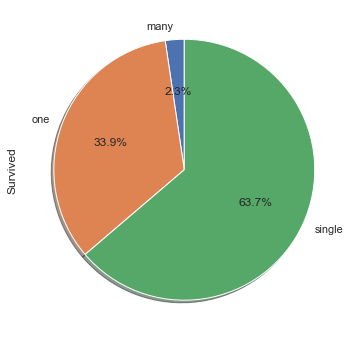

In [111]:
fam_sizegraph.plot.pie(autopct='%1.1f%%',
        shadow=True, startangle=90)

this shows that 63% of the survivors were single didn't have relatives